<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


# Breast Cancer Clustering



## 1. 아래의 주소를 참조하여, 데이터를 `df`에 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- Feature마다 scale이 다르기 때문에 `StandardScaler`를 적용해야합니다.
- 이후,  "diagnosis"에 있는 label 데이터를 따로 `label`이라는 변수로 생성하세요.
- "diagnosis"를 제거한 나머지 데이터를 사용하여 k-means clustering을 하며, 
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

# 데이터 불러오기
df = pd.read_csv('/content/data.csv')

# 결측값이 있는 열(column)제거
df = df.dropna(axis=1)

# id열(column)제거하기.
df = df.drop(columns='id')

# label 변수 생성
label = df['diagnosis']

# StandardScaler를 사용하여 정규화하기
df_no_dia = df.drop('diagnosis',axis=1)
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_no_dia)
df_scaler_dfform = pd.DataFrame(data=df_scaler,columns=df_no_dia.columns)

# k-means clustering
kmeans = KMeans(n_clusters=2,random_state=31)
kmeans.fit(df_scaler)

result = df_scaler_dfform.copy()
result['cluster'] = kmeans.labels_
result

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


## 2. 원래 데이터의 label과, clustering 이후의 라벨을 비교하여 accuracy를 측정하고 결과를 `Acc`에 저장하세요. 

- Acc = 전체 데이터 중 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = $(2 + 2) \over 6$

이때 아래의 코드를 참고하여 `0`과 `1`로 있는데이터를 `M`과 `B`로 바꿔서 작업하면 좋습니다. 

```python
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
```

In [3]:
result["cluster"] = pd.DataFrame(kmeans.labels_).replace({0:'M',1:'B'})
Acc = (label == result['cluster']).sum() / len(result)
Acc

0.08963093145869948



# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>


In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
import matplotlib.pyplot as plt

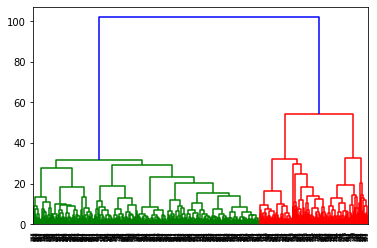

In [12]:
# create a dendrogram _ ward
dendrogram = sch.dendrogram(sch.linkage(df_scaler,method='ward'))

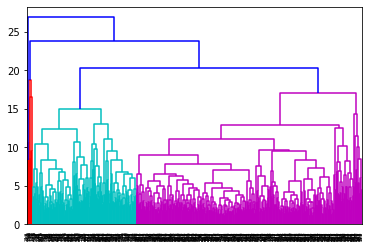

In [13]:
# create a dendrogram _ complete
dendrogram = sch.dendrogram(sch.linkage(df_scaler,method='complete'))

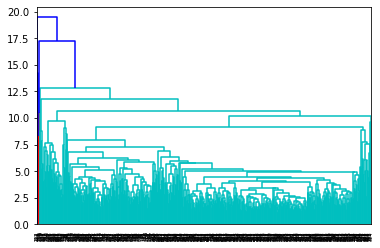

In [14]:
# create a dendrogram _ average
dendrogram = sch.dendrogram(sch.linkage(df_scaler,method='average'))

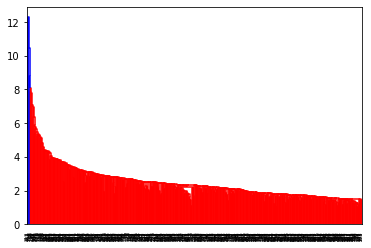

In [15]:
# create a dendrogram _ single
dendrogram = sch.dendrogram(sch.linkage(df_scaler,method='single'))

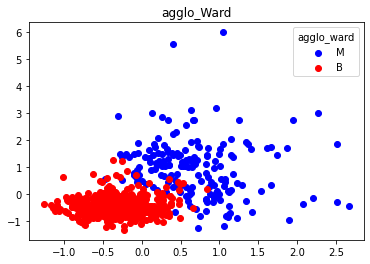

In [36]:
# make
agglo= FeatureAgglomeration(n_clusters=2,linkage='ward').fit(df_scaler)
result = pd.DataFrame(agglo.transform(df_scaler),columns=['X','Y'])

# create scatter plot linkage = ward
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_scaler)
plt.scatter(result['X'][y_hc == 0],result['Y'][y_hc == 0],c='b',label='M')
plt.scatter(result['X'][y_hc == 1],result['Y'][y_hc == 1],c='r',label='B')
plt.legend(loc=1,title='agglo_ward')
plt.title('agglo_Ward')
plt.show()

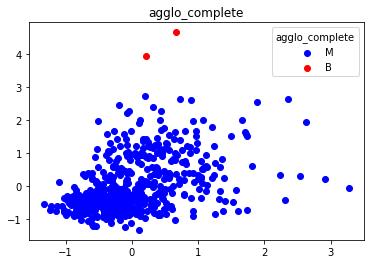

In [41]:
agglo= FeatureAgglomeration(n_clusters=2,linkage='complete').fit(df_scaler)
result = pd.DataFrame(agglo.transform(df_scaler),columns=['X','Y'])

# create scatter plot linkage = complete
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_hc = hc.fit_predict(df_scaler)
plt.scatter(result['X'][y_hc == 0],result['Y'][y_hc == 0],c='b',label='M')
plt.scatter(result['X'][y_hc == 1],result['Y'][y_hc == 1],c='r',label='B')
plt.legend(loc=1,title='agglo_complete')
plt.title('agglo_complete')
plt.show()

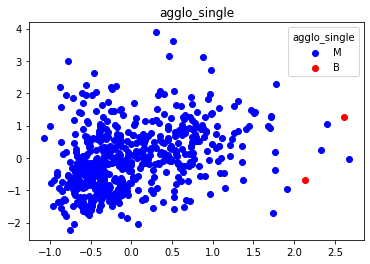

In [44]:
agglo= FeatureAgglomeration(n_clusters=2,linkage='single').fit(df_scaler)
result = pd.DataFrame(agglo.transform(df_scaler),columns=['X','Y'])

# create scatter plot linkage = single
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
y_hc = hc.fit_predict(df_scaler)
plt.scatter(result['X'][y_hc == 0],result['Y'][y_hc == 0],c='b',label='M')
plt.scatter(result['X'][y_hc == 1],result['Y'][y_hc == 1],c='r',label='B')
plt.legend(loc=1,title='agglo_single')
plt.title('agglo_single')
plt.show()

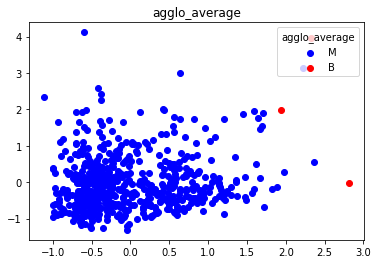

In [45]:
agglo= FeatureAgglomeration(n_clusters=2,linkage='average').fit(df_scaler)
result = pd.DataFrame(agglo.transform(df_scaler),columns=['X','Y'])

# create scatter plot linkage = average
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
y_hc = hc.fit_predict(df_scaler)
plt.scatter(result['X'][y_hc == 0],result['Y'][y_hc == 0],c='b',label='M')
plt.scatter(result['X'][y_hc == 1],result['Y'][y_hc == 1],c='r',label='B')
plt.legend(loc=1,title='agglo_average')
plt.title('agglo_average')
plt.show()